Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nazar Yaremko"
COLLABORATORS = ""

---

# CS110 Pre-class Work 5.2

## Question 1.
Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

7 will be the divider because it is in the end of the list.  
i = -1  
is 1 < 7?  
Yes -> i = 0, j = 0, A = [1,5,6,2,3,8,9,4,7]  
is 5 < 7?  
Yes -> i = 1, j = 1, A = [1,5,6,2,3,8,9,4,7]  
is 6 < 7?  
Yes -> i = 2, j = 2, A = [1,5,6,2,3,8,9,4,7]  
is 2 < 7?  
Yes -> i = 3, j = 3, A = [1,5,6,2,3,8,9,4,7]  
is 3 < 7?  
Yes -> i = 4, j = 4, A = [1,5,6,2,3,8,9,4,7]  
is 8 < 7?  
No -> j = 5  
is 9 < 7?  
No -> j = 6  
is 4 < 7?  
Yes -> i = 5, j = 7, A = [1,5,6,2,3,4,9,8,7]  

Now we swap the divider with the number under index i+1. Since i is 5 in the end, we place the divider under index 6 and the final array will look like this: [1,5,6,2,3,4,7,8,9]  
The final value of i is 5. 

## Question 2.
Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [83]:
def partition(A,p,r):
    #using the last number to be a divider
    x = A[r]
    #creating a variable that we will update every time we find a value to the left of the divider that is smaller
    i = p - 1 
    #iterating through the list
    for j in range(p, r):
        #checking if the number is smaller than the divider
        if A[j] < x:
            #if yes, then updating i
            i = i+1
            #swapping the value under index j to the value under index i
            #this will assure that the values smaller to the divider always stay to the left from A[i+1]
            A[j],A[i] = A[i],A[j]
    #placing the divider in the correct position
    A[i+1],A[r] = A[r], A[i+1]
    #returning index of the divider
    return i+1

In [84]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3.

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [85]:
def quick_sort(A,p,r):
    #checking if the list is not empty
    if p<r:
        #finding the place where we need to put the divider
        q = partition(A,p,r)
        #recursively calling the function on the first half of the list
        quick_sort(A,p,q-1)
        #recursively calling the function on the second half of the list
        quick_sort(A,q+1,r)
    return A

In [86]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4. 
Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [87]:
#importing all of the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import time as time

#creating empty lists for the times
t1 = []
t2 = []

#this for loops creates 119 lists of different sizes that contain numbers that are sorted in a descending order
for k in range(1,120):
    list_1 = []
    for i in range(10*k, 0, -1):
        list_1.append(i)
    #here we record the time for each sorting operation
    a = time.time()
    quick_sort(list_1, 0, len(list_1)-1)
    b = time.time()
    t1.append(b-a)
  #this for loops creates 119 lists of different sizes that contain identical numbers 
for k in range(1,120):
    list_2 = []
    for i in range(1, 10*k):
        list_2.append([2]*i)
    #here we record the time for each sorting operation
    a = time.time()
    quick_sort(list_2, 0, len(list_2)-1)
    b = time.time()
    t2.append(b-a)
    
#creating values for the x axis that represent sizes of the inputs.
x = list(np.linspace(0, 1200, 119))

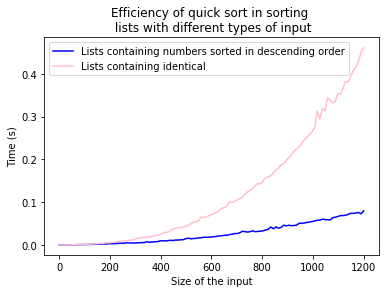

In [89]:
#plotting the graphs
plt.plot(x,t1,label = "Lists containing numbers sorted in descending order", color = "blue")
plt.plot(x,t2,label = "Lists containing identical", color = "pink")

plt.title("Efficiency of quick sort in sorting \n lists with different types of input")
plt.ylabel("Time (s)")
plt.xlabel("Size of the input")
plt.legend(loc="upper left")

As we can see, the lists which contain identical numbers are sorted much slower. This can be explained by the fact that partitions in such case will always be unbalanced because "if A[j] < x:" in the partition function will never be satisfied so the divider will always be placed in the beginning of the list. As we could read in chapter 7.2, in the worst case scenario, time complexity of quick_sort is O(N^2) which can be seen by the quadratic growth of the orange line. On the other hand, if all of the numbers are in a reversed order, the divider will be placed in different spots all the time. In this case, time complexity will be O(nlogn) and I think that the reason for this is that some of the divisions will be balanced and some of them will be unbalanced. This can be confirmed by looking at the blue line that is growing logarithmically.